In [1]:
import mysql.connector as myconn
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

mydb=myconn.connect(host="localhost",user="root",password="Cybrom#1123",database="GovComplaints")
cursor=mydb.cursor()
def fetch_complaint():
    print(cursor.execute("select * from complaints"))
    columns = ["User_id","Complaint_id", "Complaints", "Priority", "Department_id", "Status"]
    data=cursor.fetchall()
    data=pd.DataFrame(data,columns=columns)
    return data



In [2]:
def create_plot(data):
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x="Status", palette="viridis", hue="Status", legend=False)

# Customize the plot
    plt.title("Number of Complaints by Status")
    plt.xlabel("Complaint Status")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig("my_plot.png", dpi=300, bbox_inches="tight") 

None


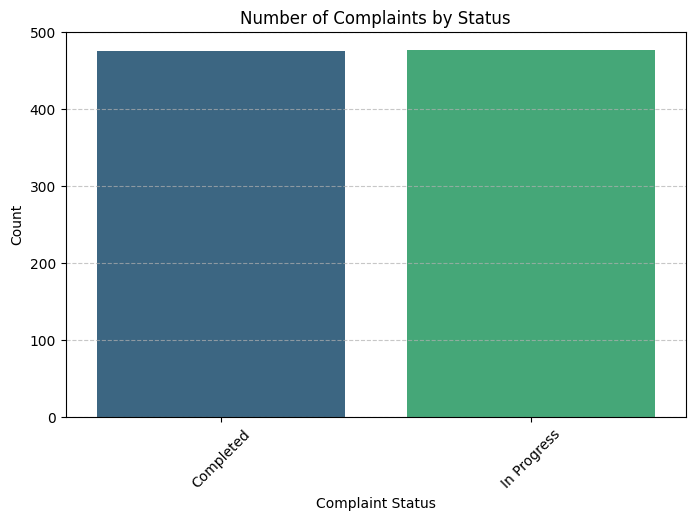

In [3]:
data=fetch_complaint()
create_plot(data)

In [4]:
fetch_complaint()

None


,User_id,Complaint_id,Complaints,Priority,Department_id,Status
0,1,1,"There is an ongoing robbery at my house, pleas...",Moderate,1,Completed
1,2,2,I just witnessed a kidnapping near the central...,Less Priority,1,In Progress
2,3,3,"A serious accident just happened, and people a...",Moderate,1,In Progress
3,4,4,"A gang fight is happening near my street, they...",Less Priority,1,In Progress
4,5,5,"My house is on fire, I need emergency services...",Moderate,1,Completed
...,...,...,...,...,...,...
948,949,949,A neighborhood lacks a designated parking spac...,Less Priority,12,In Progress
949,950,950,Public gardens need better maintenance and rep...,Less Priority,12,Completed
950,951,951,"A new road sign has been placed incorrectly, c...",Less Priority,12,Completed
951,952,952,"A dog park is not properly fenced, allowing do...",Less Priority,12,In Progress


In [5]:
priority=dict(data["Priority"].value_counts())

In [6]:
priority.values()

dict_values([381, 344, 228])

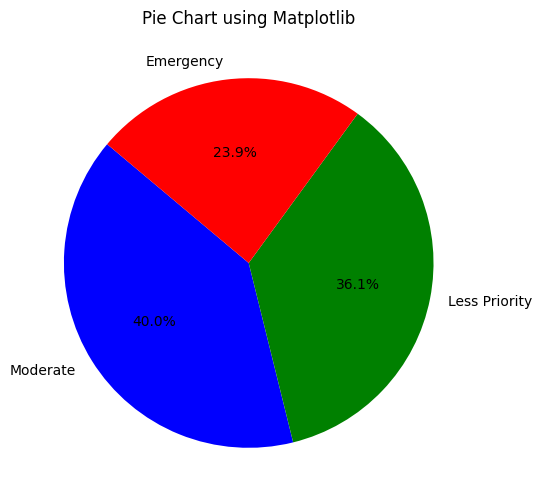

In [7]:
plt.figure(figsize=(6, 6))
plt.pie(priority.values(), labels=priority.keys(), colors=['blue', 'green', 'red'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart using Matplotlib')
plt.show()

In [8]:
data

,User_id,Complaint_id,Complaints,Priority,Department_id,Status
0,1,1,"There is an ongoing robbery at my house, pleas...",Moderate,1,Completed
1,2,2,I just witnessed a kidnapping near the central...,Less Priority,1,In Progress
2,3,3,"A serious accident just happened, and people a...",Moderate,1,In Progress
3,4,4,"A gang fight is happening near my street, they...",Less Priority,1,In Progress
4,5,5,"My house is on fire, I need emergency services...",Moderate,1,Completed
...,...,...,...,...,...,...
948,949,949,A neighborhood lacks a designated parking spac...,Less Priority,12,In Progress
949,950,950,Public gardens need better maintenance and rep...,Less Priority,12,Completed
950,951,951,"A new road sign has been placed incorrectly, c...",Less Priority,12,Completed
951,952,952,"A dog park is not properly fenced, allowing do...",Less Priority,12,In Progress


In [9]:
cursor.execute("select * from complaints inner join department_info using (Department_id) inner join user_info using (user_id)")
data=cursor.fetchall()
columns=["User_id","Department_id","Comlplaint_id","Complaint","Priority","Status","Department","govEmail","govPassword","Username","Mobile","Address","Email user","password user"]
data=pd.DataFrame(data,columns=columns)
data

,User_id,Department_id,Comlplaint_id,Complaint,Priority,Status,Department,govEmail,govPassword,Username,Mobile,Address,Email user,password user
0,1,1,1,"There is an ongoing robbery at my house, pleas...",Moderate,Completed,Police Department,ishantchouhan273@gmail.com,jlxgwhgytgkevxxa,Parinaaz Gour,917048100778,"H.No. 72,Sunder Chowk, Jamnagar 440421",wtravis@banks.biz,0%D69Zi^P*
1,2,1,2,I just witnessed a kidnapping near the central...,Less Priority,In Progress,Police Department,ishantchouhan273@gmail.com,jlxgwhgytgkevxxa,Stuvan Vala,9641208767,"119,Basak Zila,Khandwa 856843",jennifer11@hotmail.com,JqLya1!d#2
2,3,1,3,"A serious accident just happened, and people a...",Moderate,In Progress,Police Department,ishantchouhan273@gmail.com,jlxgwhgytgkevxxa,Akarsh Bal,7623011102,"60,Bassi Street,Ramagundam-902054",pattersonbenjamin@richards.biz,bz)8Zxuqch
3,4,1,4,"A gang fight is happening near my street, they...",Less Priority,In Progress,Police Department,ishantchouhan273@gmail.com,jlxgwhgytgkevxxa,Riya Sidhu,1011484701,"H.No. 00,Solanki Path, Jalna-367622",qjohnson@nguyen.net,h$p*0SGhLk
4,5,1,5,"My house is on fire, I need emergency services...",Moderate,Completed,Police Department,ishantchouhan273@gmail.com,jlxgwhgytgkevxxa,Nayantara Deshpande,4385310205,"H.No. 443,Kala,Coimbatore-458377",briggskevin@mills.com,^5WJoRy6#w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,949,12,949,A neighborhood lacks a designated parking spac...,Less Priority,In Progress,Muncipal Coporation Department,ishantchouhan273@gmail.com,jlxgwhgytgkevxxa,Arhaan Iyengar,7979047061,"H.No. 03, Bali Ganj,Mehsana 128641",amandarobinson@gmail.com,!sb4uMbt$k
949,950,12,950,Public gardens need better maintenance and rep...,Less Priority,Completed,Muncipal Coporation Department,ishantchouhan273@gmail.com,jlxgwhgytgkevxxa,Riaan Sawhney,7470731612,"930, Chaudhari Nagar, Yamunanagar-665211",vjohnson@pitts.com,3PwKELk3)^
950,951,12,951,"A new road sign has been placed incorrectly, c...",Less Priority,Completed,Muncipal Coporation Department,ishantchouhan273@gmail.com,jlxgwhgytgkevxxa,Aaina Taneja,584431950,"774,D’Alia Road, Rohtak 710865",blackthomas@velasquez.com,^2VIDAcLvq
951,952,12,952,"A dog park is not properly fenced, allowing do...",Less Priority,In Progress,Muncipal Coporation Department,ishantchouhan273@gmail.com,jlxgwhgytgkevxxa,Aaina Dada,919811914556,"H.No. 52, Kaul Road, Berhampur 649712",don58@gmail.com,t2jeC+WiH*


In [10]:
cursor.execute("UPDATE complaints SET Status = 'Completed' WHERE Complaint_id = 1")
mydb.commit()  # Commit the changes to the database
print("Successful")


Successful


In [11]:
data["User_id"][0]

1

In [12]:
mydb = myconn.connect(host="localhost", user="root", password="Cybrom#1123", database="GovComplaints")
cursor = mydb.cursor()
    
cursor.execute("SELECT * FROM department_info")
columns = ["Department_id", "Departments","Emails","Password"]
data = cursor.fetchall()
    
    # Convert data to DataFrame
data = pd.DataFrame(data, columns=columns)
email_data=data[data["Emails"]=="ishantchouhan273@gmail.com"]


In [ ]:
if email_data != None:
    if email_data["Password"][0]=="jlxgwhgytgkevxxa":
        print(True)
    else:
        print(False)
else:
    print(False)

In [14]:
if email_data["Password"][0]=="jlxgwhgytgkevxxa":
    print(True)

True


In [17]:
def fetch_mail():
    mydb = myconn.connect(host="localhost", user="root", password="Cybrom#1123", database="GovComplaints")
    cursor = mydb.cursor()
    
    cursor.execute("SELECT max(User_id) FROM user_info")
    columns = ["User_id"]
    data = cursor.fetchall()
    
    # Convert data to DataFrame
    data = pd.DataFrame(data, columns=columns)
    return  data



In [20]:
data=fetch_mail()

In [24]:
fetch_mail().iloc[0]+1

User_id    954
Name: 0, dtype: int64

In [ ]:
cursor.close()
mydb.close()